<h3> KNN </h3>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
tit = pd.read_csv("D:\\MachineLearning\\Datasets\\titanic1.csv")

# Select useful columns
tit = tit[["Survived", "Pclass", "Sex", "Age", "Fare"]]

# Remove missing rows
tit = tit.dropna()

# Encode Sex
tit["Sex"] = tit["Sex"].map({"male": 0, "female": 1})

# Features and target
X = tit[["Pclass", "Sex", "Age", "Fare"]]
y = tit["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7644444444444445

Confusion Matrix:
[[114  24]
 [ 29  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       138
           1       0.71      0.67      0.69        87

    accuracy                           0.76       225
   macro avg       0.75      0.75      0.75       225
weighted avg       0.76      0.76      0.76       225



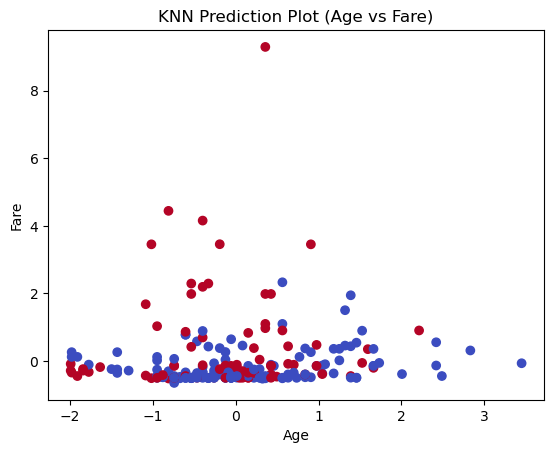

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_pred, cmap='coolwarm')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("KNN Prediction Plot (Age vs Fare)")
plt.show()
